In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv('src/datasets/taxaJuros.csv', sep=';', decimal='.')
df['InicioPeriodo'] = pd.to_datetime(df['InicioPeriodo'], errors='coerce') #transformando a coluna "InicioPeriodo" em datatime

In [40]:
df

,InicioPeriodo,FimPeriodo,codigoSegmento,Segmento,codigoModalidade,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,cnpj8,mes
0,2025-05-22,2025-05-28,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,1,BCO MUFG BRASIL S.A.,0.14,1.75,60498557,2025-05
1,2025-05-22,2025-05-28,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,2,BCO BNP PARIBAS BRASIL S A,0.42,5.09,1522368,2025-05
2,2025-05-22,2025-05-28,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,3,BCO DO BRASIL S.A.,0.42,5.12,0,2025-05
3,2025-05-22,2025-05-28,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,4,BCO SUMITOMO MITSUI BRASIL S.A.,0.45,5.59,60518222,2025-05
4,2025-05-22,2025-05-28,2,Pessoa Jurídica,502205,Adiantamento sobre contratos de câmbio (ACC) -...,5,BCO CITIBANK S.A.,0.46,5.62,33479023,2025-05
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2025-05-05,2025-05-09,2,Pessoa Jurídica,210101,Capital de giro com prazo até 365 dias - Pré-f...,13,BANCO BTG PACTUAL S.A.,2.43,33.37,30306294,2025-05
9996,2025-05-05,2025-05-09,2,Pessoa Jurídica,210101,Capital de giro com prazo até 365 dias - Pré-f...,14,BCO GUANABARA S.A.,2.59,35.84,31880826,2025-05
9997,2025-05-05,2025-05-09,2,Pessoa Jurídica,210101,Capital de giro com prazo até 365 dias - Pré-f...,15,PLANTAE CFI,2.62,36.41,35551187,2025-05
9998,2025-05-05,2025-05-09,2,Pessoa Jurídica,210101,Capital de giro com prazo até 365 dias - Pré-f...,16,STARA FINANCEIRA S.A. - CFI,2.70,37.64,17359351,2025-05


In [14]:
print(f"Total de registros: {len(df):,}")
print(f"Período da base: {df['InicioPeriodo'].min().date()} até {df['InicioPeriodo'].max().date()}")


Total de registros: 10,000
Período da base: 2025-05-05 até 2025-05-22


---
## Bancos com maiores médias de juros


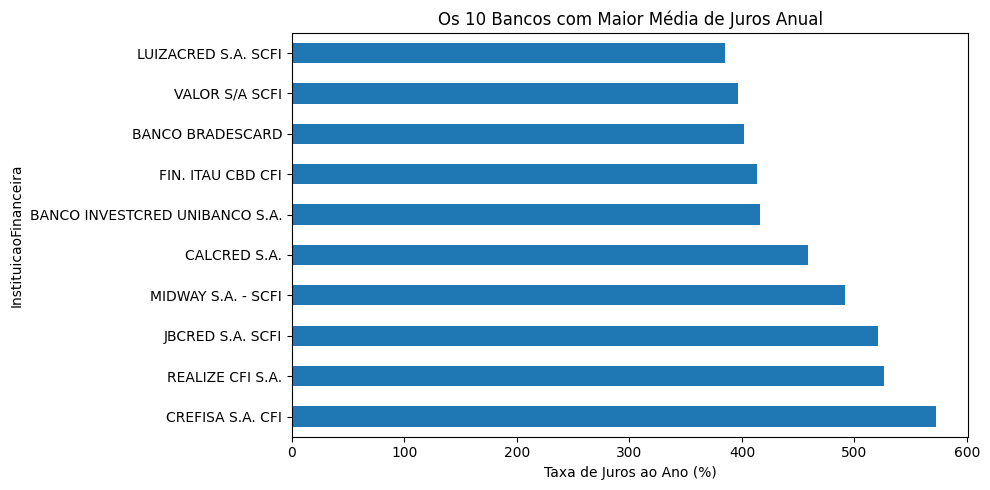

In [16]:
top_bancos = df.groupby('InstituicaoFinanceira')['TaxaJurosAoAno'].mean().sort_values(ascending=False).head(10)

top_bancos.plot(kind='barh', figsize=(10, 5), title='Os 10 Bancos com Maior Média de Juros Anual')
plt.xlabel('Taxa de Juros ao Ano (%)')
plt.tight_layout()
plt.show()


🧠 Insight: “Algumas instituições cobram até 2x mais juros do que a média nacional.”

---
## Modalidades com juros mais altos e instáveis

In [33]:
df_grouped = (df.groupby('Modalidade')['TaxaJurosAoAno'].agg(Media="mean", DesvioPadrao="std", Quantidade="count").sort_values(by='Media', ascending=False).head(10))

df_grouped.style.set_caption("Modalidades com maiores taxas médias de juros")\
    .format({"Media": "{:.2f}", "DesvioPadrao": "{:.2f}"})\
    .background_gradient(cmap='Reds')


,Media,DesvioPadrao,Quantidade
Modalidade,,,
Cartão de crédito - rotativo total - Pré-fixado,482.65,248.81,761
Cartão de crédito - parcelado - Pré-fixado,192.66,122.25,749
Cheque especial - Pré-fixado,176.55,119.04,705
Crédito pessoal não-consignado - Pré-fixado,156.96,183.74,1075
Conta garantida - Pré-fixado,89.78,105.03,379
Capital de giro com prazo até 365 dias - Pré-fixado,62.42,73.91,592
Aquisição de outros bens - Pré-fixado,59.42,42.40,472
Desconto de cheques - Pré-fixado,50.44,24.92,194
Crédito pessoal consignado privado - Pré-fixado,48.47,22.80,572


Evolução da Taxa de Juros ao Longo do Tempo

C:\Users\rihan\AppData\Local\Temp\ipykernel_8712\1266642013.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\API_Taxas_juros\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


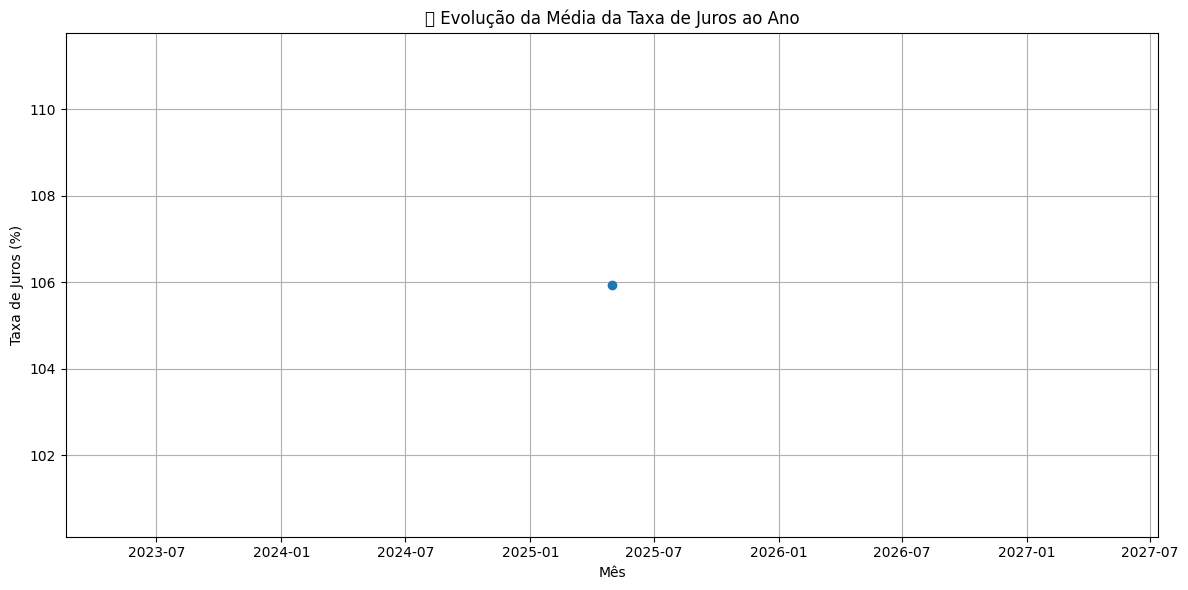

In [44]:
df['mes'] = df['InicioPeriodo'].dt.to_period("M")
evolucao = df.groupby('mes')['TaxaJurosAoAno'].mean()
evolucao.index = evolucao.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(evolucao, marker='o')
plt.title("📈 Evolução da Média da Taxa de Juros ao Ano")
plt.xlabel("Mês")
plt.ylabel("Taxa de Juros (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

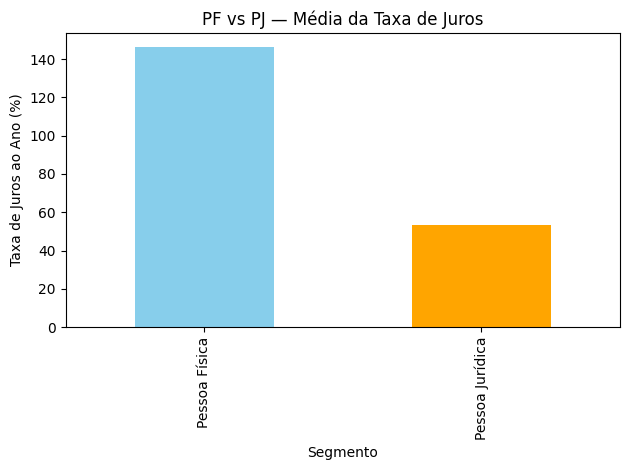

In [42]:
tipo_pessoa = df.groupby('Segmento')['TaxaJurosAoAno'].mean()

tipo_pessoa.plot(kind='bar', color=['skyblue', 'orange'], title="PF vs PJ — Média da Taxa de Juros")
plt.ylabel('Taxa de Juros ao Ano (%)')
plt.tight_layout()
plt.show()